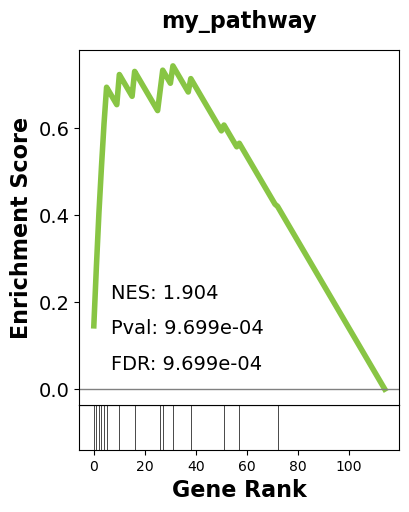

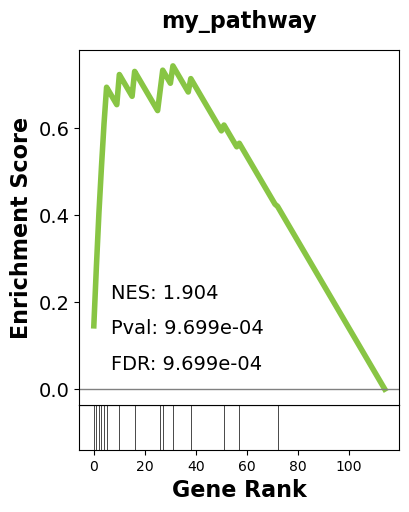

In [ ]:
import numpy as np
import pandas as pd
import gseapy as gp

# Seed for reproducibility
np.random.seed(42)

n_genes_in_pathway = 15
n_genes_in_background = 100
n_samples_per_group = 15

pathway_genes = { f"PathwayGene{i}" for i in range(1, n_genes_in_pathway + 1 ) }
pathway_db = {"my_pathway" : pathway_genes }
genes = list(pathway_genes) + [f"Gene{i}" for i in range(1, n_genes_in_background + 1 )]
samples = [f"Sample{j}" for j in range(1, 2*n_samples_per_group + 1)]
fake_data = pd.DataFrame(np.random.normal(0, 1, size=(len(genes), len(samples))), index=genes, columns=samples)

for gene in pathway_genes:
    if gene in fake_data.index:
        # Make pathway genes have higher values in the first half of samples using iloc
        fake_data.loc[gene, fake_data.columns[:n_samples_per_group]] += np.random.normal(0.5, 0.5, size=n_samples_per_group)

labels = ["Healthy"]*n_samples_per_group + ["Sick"]*n_samples_per_group

gs = gp.GSEA(data=fake_data, 
                 gene_sets=pathway_db, 
                 classes=labels, # cls=class_vector
                 permutation_type='phenotype', # null from permutations of class labels
                 permutation_num=2000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 threads=4, # Number of allowed parallel processes
                 seed=42,
                 format='png',)
gs.run()
#gs.plot("my_pathway", show_ranking=False, legend_kws={'loc': (1.05, 0)}, )
